# Air-helium shock bubble interaction
This case simulates a two-dimensional helium bubble in air that interacts with a Mach 1.22 shock using the level-set method.

# Imports

In [1]:
import numpy as np
from jaxfluids import InputManager, InitializationManager, SimulationManager
from jaxfluids_postprocess import load_data, create_2D_animation, create_2D_figure
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Run simulation

In [ ]:
input_manager = InputManager("inputfiles/case_setup_levelset.json",
                             "../numerical_setup_files/numerical_setup_levelset.json")
initialization_manager  = InitializationManager(input_manager)
sim_manager = SimulationManager(input_manager)
simulation_buffers, time_control_variables, forcing_parameters = initialization_manager.initialization()
sim_manager.simulate(simulation_buffers, time_control_variables)

# Load and Visualization

Loading time snapshot 0.0000e+00
Loading time snapshot 1.0004e-04
Loading time snapshot 2.0012e-04
Loading time snapshot 3.0019e-04
Loading time snapshot 4.0011e-04
Loading time snapshot 5.0013e-04
Loading time snapshot 6.0018e-04
Loading time snapshot 7.0001e-04
Loading time snapshot 8.0001e-04
Loading time snapshot 9.0005e-04
Loading time snapshot 1.0002e-03


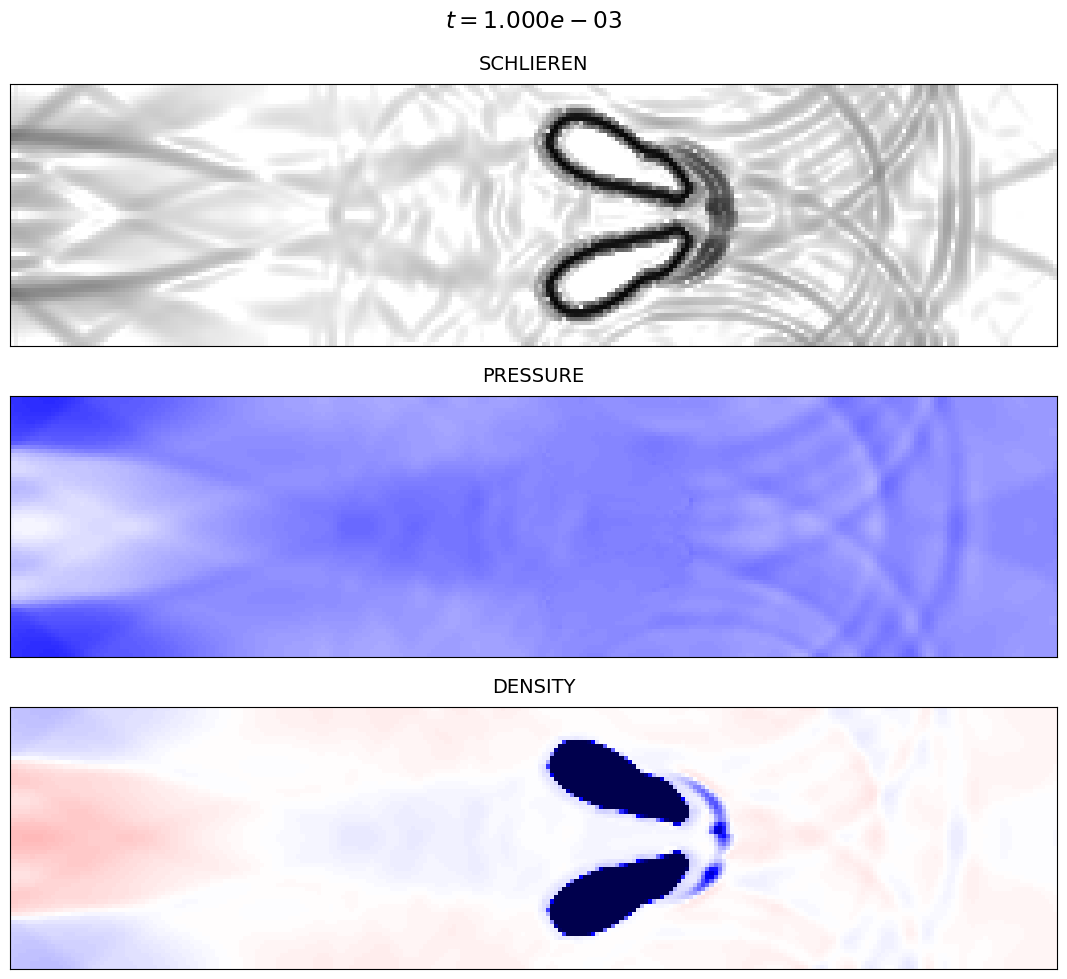

Saving image_0000
Saving image_0001
Saving image_0002
Saving image_0003
Saving image_0004
Saving image_0005
Saving image_0006
Saving image_0007
Saving image_0008
Saving image_0009
Saving image_0010


In [3]:
path = sim_manager.output_writer.save_path_case
quantities = ["schlieren", "real_pressure", "real_density"]
cell_centers, cell_sizes, times, data_dict = load_data(path, quantities, step=1)

schlieren = data_dict["schlieren"]
schlieren /= np.max(schlieren)
schlieren = np.clip(schlieren, 1e-3, 1e0)

plot_dict = {
    "schlieren": schlieren,
    "pressure": data_dict["real_pressure"],
    "density": data_dict["real_density"],
}

nrows_ncols = (3,1)
minmax_list = [
    [1e-3, 1e0],
    [1e5, 2.5e5],
    [0.8, 2.5]
    ]

create_2D_figure(plot_dict, times, nrows_ncols, cell_centers=cell_centers, plane="xy",
                 plane_value=0.0, minmax_list=minmax_list, dpi=300, fig_args={"figsize": (20,10)})

save_path = os.path.join(path,"images")
os.makedirs(save_path, exist_ok=True)
create_2D_animation(plot_dict, cell_centers, times, nrows_ncols=nrows_ncols,
                    save_png=save_path, fig_args={"figsize": (20,10)},
                    minmax_list=minmax_list, dpi=300)
